# Day 3

- Necessary conditions
- Contours
- Optimization problem definition
- Gotchas


In [1]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt

# Set figure options
plt.rcParams['figure.figsize'] = [6, 6] # Need square aspect ratio for gradients to appear normal
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## Necessary conditions

---

### First order necessary condition

A point $v$ is a *critical point* for a function $f(v)$ if its gradient is equal to zero:

$$\nabla_v f(v^*) = 0$$

This is the *first order necessary condition* for optimality


### Curvature condition

For a point $v^*$ to be a minimum for $f$, it must be a critical point and satisfy a positive curvature condition; the hessian must be *positive definite* at that point

$$w^{\top} \left.\nabla_v^2 f\right|_{v^*} w > 0\text{ for all }w \in \mathbb{R}^d$$


### Why these conditions?

Both the FONC and curvature condition *must* be met for a point $v^*$ to be a minimum of a function $f$.

First, note that if $\nabla_v f(v^*) \neq 0$, then we can pick some $\delta v = -c\nabla_v f(v^*)$ and select $v + \delta v$ to obtain a smaller point. Thus $\nabla_v f(v^*) = 0$.

Next, Taylor expand the objective function around a critical point $v^*$

$$f(v) = f(v^*) + \left.\nabla_v f\right|_{v^*}^{\top} (v - v^*) + \frac{1}{2} (v - v^*)^{\top} \left.\nabla_v^2 f\right|_{v^*} (v - v^*) + O(\|v - v^*\|^3)$$

For a minimum, we require that $f(v)$ have a larger value than $f(v^*)$ for all $v$, thus

$$0 < f(v) - f(v^*) \approx \frac{1}{2} (v - v^*)^{\top} \left.\nabla_v^2 f\right|_{v^*} (v - v^*)$$

The resulting inequality is the positive definite condition; our curvature condition.

$$0 < w^{\top} \left.\nabla_v^2 f\right|_{v^*} w\text{ for all }w = v - v^*$$


## Contours

---

A *contour* of a function $f : \mathbb{R}^d \to \mathbb{R}$ is a set of vectors $v \in \mathbb{R}^d$ that have a constant function value

$$c\text{-contour of f} = \{v \,|\, f(v) = c\}$$

Contours are a useful way to visualize a function of two variables. Let's take a look at contours of

$$f = x + xy + y^2$$


Text(0, 0.5, 'Y')

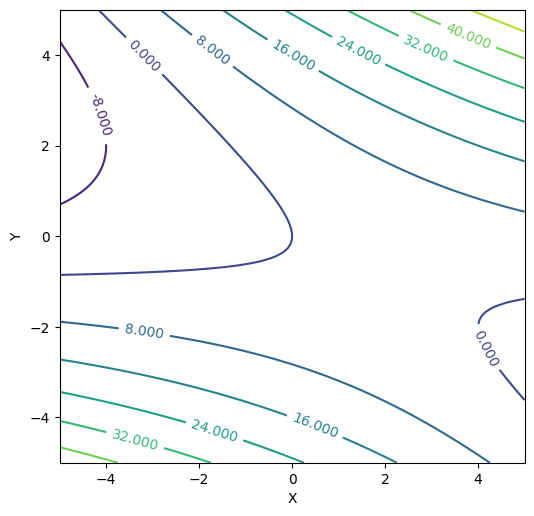

In [2]:
## Generate model
md_poly = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x + df.x * df.y + df.y**2
        ),
        var=["x", "y"],
        out=["f"]
    )
)

## Evaluate
df_poly = (
    md_poly
    >> gr.ev_df(
        df=gr.tran_outer(
            gr.df_make(x=np.linspace(-5, +5, num=100)),
            gr.df_make(y=np.linspace(-5, +5, num=100)),
        )
    )
)
X = np.array(df_poly.x).reshape((100, 100))
Y = np.array(df_poly.y).reshape((100, 100))
F = np.array(df_poly.f).reshape((100, 100))

## Visualize
fig, ax = plt.subplots()
CS = ax.contour(X, Y, F, levels=10)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")


Can I minimize this function?

Not really! Thanks to the $x$ term in $f = x + xy + y^2$, we can take $x \to -\infty$ to obtain an arbitrarily small value of $f$. This function is *unbounded below*.

What about the next function? Can I minimize it?


Text(0, 0.5, 'Y')

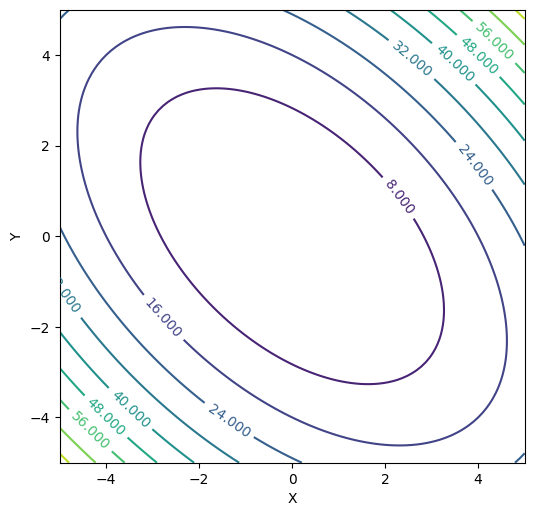

In [3]:
## Generate model
md_bowl = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.x * df.y + df.y**2
        ),
        var=["x", "y"],
        out=["f"]
    )
)

## Evaluate
df_bowl = (
    md_bowl
    >> gr.ev_df(
        df=gr.tran_outer(
            gr.df_make(x=np.linspace(-5, +5, num=100)),
            gr.df_make(y=np.linspace(-5, +5, num=100)),
        )
    )
)
Xb = np.array(df_bowl.x).reshape((100, 100))
Yb = np.array(df_bowl.y).reshape((100, 100))
Fb = np.array(df_bowl.f).reshape((100, 100))

## Visualize
fig, ax = plt.subplots()
CS = ax.contour(Xb, Yb, Fb, levels=10)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")


You'll see how to make contour plots in NB0, q1.5.

### Gradient is *normal* to contours

Contours are curves of constant $f$, while the gradient defines the linear behavior of the function. In order to keep $f$ constant, we **need to move normal to the gradient**. Imagine $v_0$ is on a contour of $f$; to stay on the contour, let's look at a first-order Taylor expansion:

$$f(v) \approx f(v_0) + \left.\nabla_v f\right|_{v_0}^{\top} (v - v_0) + O(\|v\|^2)$$

For $f(v)$ to remain constant, we need $\left.\nabla_v f\right|_{v_0}^{\top} (v - v_0) = 0$

Taking a limit of $v \to v_0$ gives us the local direction of the contour, so this shows that the gradient must be **orthogonal to** a contour.

Text(0, 0.5, 'Y')

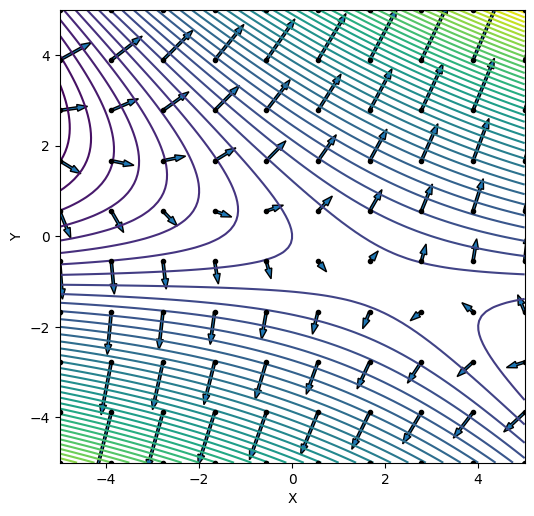

In [4]:
## Evaluate
n=10
df_base = gr.tran_outer(
    gr.df_make(x=np.linspace(-5, +5, num=n)),
    gr.df_make(y=np.linspace(-5, +5, num=n)),
)
df_poly_grad = (
    md_poly
    >> gr.ev_grad_fd(df_base=df_base, h=1e-6)
)
grad_x = df_base.x
grad_y = df_base.y
grad_dx = df_poly_grad.Df_Dx * 0.1
grad_dy = df_poly_grad.Df_Dy * 0.1

## Visualize
fig, ax = plt.subplots()
CS = ax.contour(X, Y, F, levels=50)
plt.plot(grad_x, grad_y, "k.")
for i in range(len(grad_x)):
    plt.arrow(
        grad_x[i],
        grad_y[i],
        grad_dx[i],
        grad_dy[i],
        width=0.05
    )
# ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")


Note that we **need** the aspect ratio of the plot to be 1:1, unless the gradient won't appear to be normal!


## Optimization problems

---

There are a few ingredients to an optimization problem:

### General form

$$\min\, f(v; \theta)$$
$$\text{wrt.}\, v$$
$$\text{s.t.} g_i(v; \theta) \leq 0$$
$$\text{s.t.} h_j(v; \theta) = 0$$

### Objective function

The function $f(v)$ that we seek to minimize or maximize. Some examples:

- $f$ is cost (min)
- $f$ is is profitability (max)
- $f$ is weight of aircraft (min)
- $f$ is fuel use of a rocket (min)

### Design variables

The vector $v$ of variables we are optimizing **with respect to** (wrt.) in our problem. Sometimes called decision variables. Some examples:

- $v$ are allocations in a stock portfolio
- $v$ are business decisions; budget allocation, hiring choices, etc.
- $v$ are the geometric details of an aircraft
- $v$ represent the time history of thrust for a rocket

### Parameters

The vector $\theta$ of parameters we are *not* optimizing over. These are instead constants that are necessary within our quantitative model.

- $\theta$ are details about our market model, e.g. volatility
- $\theta$ are details about our business; total budget, unit profitability, etc.
- $\theta$ are details about aerospace materials, e.g. strength
- $\theta$ are the geometry and characteristics of a rocket

### Constraints

The $g_i$ are *inequality* constraints, and the $h_j$ are *equality* constraints. Equalities must *always* be satisfied, while inequalities can be *active* or *inactive*.

Active or inactive:
- $g_i$ represents our total purchasing power
- $g_i$ represents our budget allocation against total budget
- $g_i$ represents strength failure criteria

Equalities
- $h_j$ represents fundamental physical laws, e.g. $F = \frac{dP}{dt}$

### Why optimize?

- To design a competitive product
  - Necessary to suceed as a business!
- To solve a problem with optimization
  - E.g. landing a rocket; formulate the trajectory design as optimization, search for a solution
- To explore a design space with direction
  - E.g. search for a better material for solar cells, learn about science along the way


## Gotchas (Optional)

__Unbounded functions__

Can we minimize the following function?

$$f(x) = -x^2$$

Calling plot_sinew_outputs....


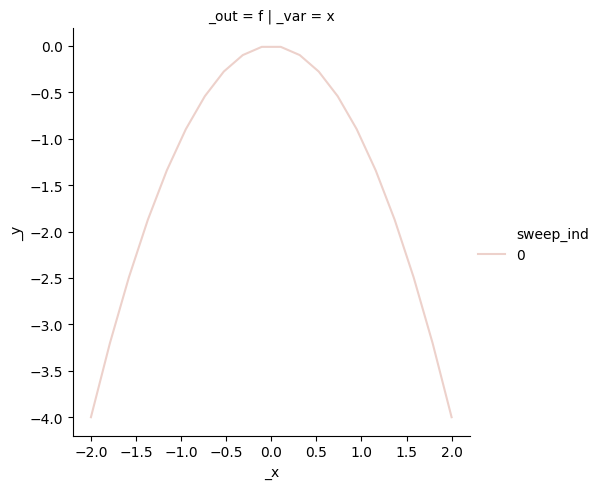

In [5]:
md_quad = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=-df.x**2
        ),
        var=["x"],
        out=["f"]
    )
    >> gr.cp_bounds(x=(-2, +2))
)

(
    md_quad
    >> gr.ev_sinews(df_det="swp", n_density=20, n_sweeps=1)
    >> gr.pt_auto()
)

The "minimum" is $-\infty$! This function *unbounded*. It doesn't make sense to minimize this function.

__A different kind of "unbounded"__

This probably looks trivial, but I saw student questions like the following in ModSim:

> What wall thickness will *optimally* keep a passive solar home at a constant temperature?

Calling plot_sinew_outputs....


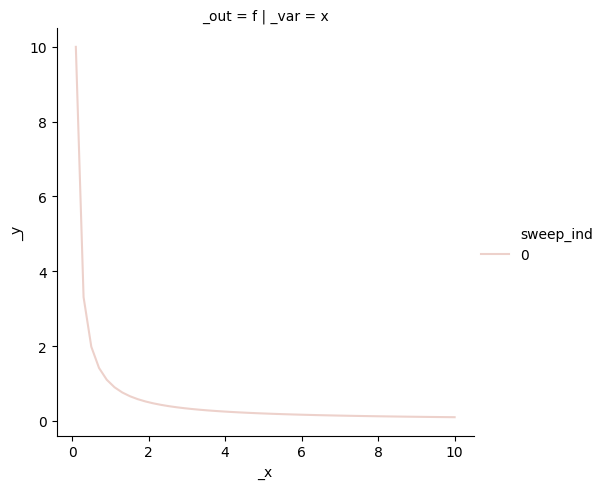

In [6]:
md_hyp = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=1 / df.x
        ),
        var=["x"],
        out=["f"]
    )
    >> gr.cp_bounds(x=(1e-1, 1e1))
)

(
    md_hyp
    >> gr.ev_sinews(df_det="swp", n_density=50, n_sweeps=1)
    >> gr.pt_auto()
)


For this minimization problem, the "optimum" $x$ value is $x \to +\infty$! This is not a *well posed* optimization problem.

Definitions:

> A **minimum** $f^*$ is a smallest **function** value; it has units of $f$.

> A **minimizer** $x^*$ is the vector of input values that achieves the minimum $f^* = f(x^*)$.

For this home insulation problem, the *minimum* is $f^* = 0$, but the minimizer is at $x^* \to +\infty$. We can't achieve the minimum function value with a reasonable input value.


__Potential solution: Additional objectives__

We can "solve" this insulation problem by introducing a second objective: Let's consider the cost of insulation:


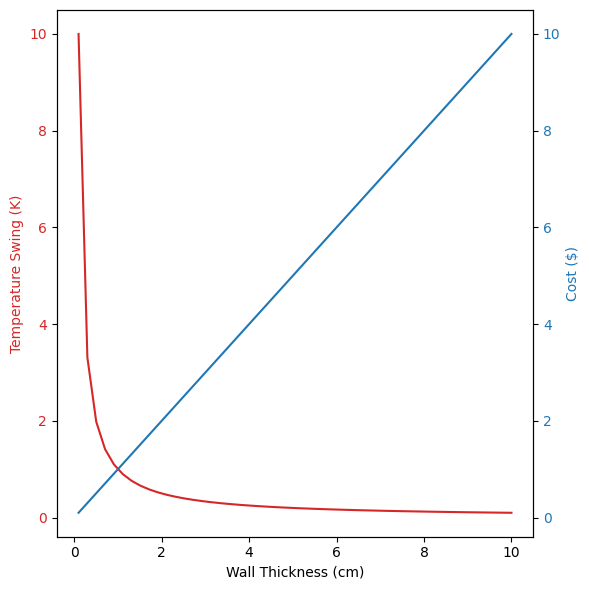

In [7]:
md_cost = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=1 / df.x,
            c=df.x
        ),
        var=["x"],
        out=["f", "c"]
    )
    >> gr.cp_bounds(x=(1e-1, 1e1))
)

df_cost = gr.eval_df(md_cost, df=gr.df_make(x=np.linspace(1e-1, 1e1)))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Wall Thickness (cm)')
ax1.set_ylabel('Temperature Swing (K)', color=color)
ax1.plot(df_cost.x, df_cost.f, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_cost.x, df_cost.c, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

Now we can see that as we increase the wall thickness, the cost of the wall increases. This doesn't totally solve the problem, but if we can specify a maximum cost (say, our budget), we can decide on the max wall thickness that satisfies our max cost constraint.

$$\min\, \text{Temperature swing}$$
$$\text{wrt.} \text{Wall thickness}$$
$$\text{s.t.} \text{Cost} \leq \text{Budget}$$
